# Part One: Classifiers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing


from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
# making a fake data set here.
X, y = make_classification(n_features=20, n_redundant=0, n_informative=5, n_clusters_per_class=1)
X += 4.0 * np.random.uniform(size=X.shape)

# Load the datasets
datasets = [np.asarray(pd.read_csv("php9xWOpn.csv")), np.asarray(pd.read_csv("dataset_59_ionosphere.csv")),np.asarray(pd.read_csv("php50jXam.csv")), np.column_stack((X, y))]
dataset_titles = ["Steel Plate Fault", "Ionsphere", "Bank Notes", "Fake Data"]


for df in datasets:
    df = df[:10]
    print(df.shape)
    
    

(10, 34)
(10, 35)
(10, 5)
(10, 21)


In [3]:
def run_classifier(clf, train_x, train_y):
    results = []
    for i in range(5):
        #train the data with a 50:50 split
        X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.5, random_state=i)
        
        clf.fit(X_train, y_train.ravel())
        pred = clf.predict(X_test)
            
        score = accuracy_score(y_test, pred)
            
        results.append(score)
    return results

In [4]:
def run_KNeighborsClassifier(train_x, train_y):
    final_results = []
    for val in [1, 2, 3, 4, 5]:
        
        clf = KNeighborsClassifier(n_neighbors=val)
        final_results.append(run_classifier(clf, train_x, train_y))
        
    return final_results

In [5]:
def run_GaussianNB(train_x, train_y):
    final_results = []
    for val in [1e-9,1e-5,1e-1]:
        
        clf = GaussianNB(var_smoothing=val)
        final_results.append(run_classifier(clf, train_x, train_y))
        
    return final_results

In [6]:
def run_LogisticRegression(train_x, train_y):
    final_results = []
    for val in [.1,.5,1.0,2.0, 5.0]:
        
        clf = LogisticRegression(C=val)
        final_results.append(run_classifier(clf, train_x, train_y))
        
    return final_results

In [7]:
def run_DecisionTreeClassifier(train_x, train_y):
    final_results = []
    for val in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        
        clf = DecisionTreeClassifier(max_depth=val)
        final_results.append(run_classifier(clf, train_x, train_y))
        
    return final_results

In [8]:
def run_GradientBoostingClassifier(train_x, train_y):
    final_results = []
    for val in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        
        clf = GradientBoostingClassifier(max_depth=val)
        final_results.append(run_classifier(clf, train_x, train_y))
        
    return final_results

In [9]:
def run_RandomForestClassifier(train_x, train_y):
    final_results = []
    for val in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        
        clf = RandomForestClassifier(max_depth=val)
        final_results.append(run_classifier(clf, train_x, train_y))
        
    return final_results

In [10]:
def run_MLPClassifier(train_x, train_y):
    final_results = []
    for val in [1e-5, 1e-3,0.1, 10.0]:
        
        clf = MLPClassifier(alpha=val, max_iter=500)
        final_results.append(run_classifier(clf, train_x, train_y))
        
    return final_results

/Users/leon/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Completed Data Set:  Steel Plate Fault


/Users/leon/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Completed Data Set:  Ionsphere


/Users/leon/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Completed Data Set:  Bank Notes


/Users/leon/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Completed Data Set:  Fake Data


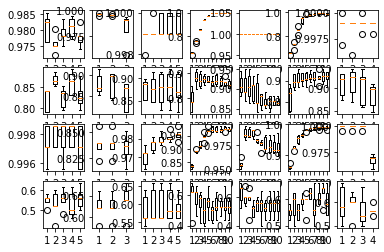

<Figure size 1944x648 with 0 Axes>

In [12]:
fig, axs = plt.subplots(4, 7)
figure = plt.figure(figsize=(27, 9))


for i, data in enumerate(datasets):
    
    i-1

    train_x, train_y = np.split(data, [-1], axis=1)
    
    #Scale the data
    ss = StandardScaler()
    train_x = ss.fit_transform(train_x)
    
    #Lebel encode the class
    le = preprocessing.LabelEncoder()
    train_y = le.fit_transform(train_y)
    
    
    axs[i, 0].boxplot(run_KNeighborsClassifier(train_x, train_y))
    axs[i, 1].boxplot(run_GaussianNB(train_x, train_y))
    axs[i, 2].boxplot(run_LogisticRegression(train_x, train_y))
    axs[i, 3].boxplot(run_DecisionTreeClassifier(train_x, train_y))
    axs[i, 4].boxplot(run_GradientBoostingClassifier(train_x, train_y))
    axs[i, 5].boxplot(run_RandomForestClassifier(train_x, train_y))
    axs[i, 6].boxplot(run_MLPClassifier(train_x, train_y))
    
    print("Completed Data Set: ", dataset_titles[i])

      
plt.tight_layout()
plt.show()
    

# Summary Tables

# Part Two: Clustering